In [0]:
import numpy as np
import pylab as pl
import pandas as pd

In [0]:
class SOM(object):
    def __init__(self, X, output, iteration, batch_size):
        """
        :param X:  形状是N*D， 输入样本有N个,每个D维
        :param output: (n,m)一个元组，为输出层的形状是一个n*m的二维矩阵
        :param iteration:迭代次数
        :param batch_size:每次迭代时的样本数量
        初始化一个权值矩阵，形状为D*(n*m)，即有n*m权值向量，每个D维
        """
        self.X = X
        self.output = output
        self.iteration = iteration
        self.batch_size = batch_size
        self.W = np.random.rand(X.shape[1], output[0] * output[1])
        print (self.W.shape)
    
    def GetN(self, t):
        """
        :param t:时间t, 这里用迭代次数来表示时间
        :return: 返回一个整数，表示拓扑距离，时间越大，拓扑邻域越小
        """
        a = min(self.output)
        return int(a-float(a)*t/self.iteration)

    def Geteta(self, t, n):
        """
        :param t: 时间t, 这里用迭代次数来表示时间
        :param n: 拓扑距离
        :return: 返回学习率，
        """
        return np.power(np.e, -n)/(t+2)

    def updata_W(self, X, t, winner):
        N = self.GetN(t)
        for x, i in enumerate(winner):
            to_update = self.getneighbor(i[0], N)
            for j in range(N+1):
                e = self.Geteta(t, j)
                for w in to_update[j]:
                    self.W[:, w] = np.add(self.W[:,w], e*(X[x,:] - self.W[:,w]))

    def getneighbor(self, index, N):
        """
        :param index:获胜神经元的下标
        :param N: 邻域半径
        :return ans: 返回一个集合列表，分别是不同邻域半径内需要更新的神经元坐标
        """
        a, b = self.output
        length = a*b
        def distence(index1, index2):
            i1_a, i1_b = index1 // a, index1 % b
            i2_a, i2_b = index2 // a, index2 % b
            return np.abs(i1_a - i2_a), np.abs(i1_b - i2_b)

        ans = [set() for i in range(N+1)]
        for i in range(length):
            dist_a, dist_b = distence(i, index)
            if dist_a <= N and dist_b <= N: ans[max(dist_a, dist_b)].add(i)
        return ans


    def train(self):
        """
        train_Y:训练样本与形状为batch_size*(n*m)
        winner:一个一维向量，batch_size个获胜神经元的下标
        :return:返回值是调整后的W
        """
        count = 0
        while self.iteration > count:
            #train_X = self.X[np.random.choice(self.X.shape[0], self.batch_size)]
            l = np.random.choice(self.X.shape[0], self.batch_size)
            train_X = self.X[l]
            normal_W(self.W)
            normal_X(train_X)
            train_Y = train_X.dot(self.W)
            winner = np.argmax(train_Y, axis=1).tolist()
            self.updata_W(train_X, count, winner)
            count += 1
        return self.W

    def train_result(self):
        normal_X(self.X)
        train_Y = self.X.dot(self.W)
        winner = np.argmax(train_Y, axis=1).tolist()
        print (winner)
        return winner

def normal_X(X):
        """
        :param X:二维矩阵，N*D，N个D维的数据
        :return: 将X归一化的结果
        """
        N, D = X.shape
        for i in range(N):
            temp = np.sum(np.multiply(X[i], X[i]))
            X[i] /= np.sqrt(temp)
        return X
def normal_W(W):
        """
        :param W:二维矩阵，D*(n*m)，D个n*m维的数据
        :return: 将W归一化的结果
        """
        for i in range(W.shape[1]):
            temp = np.sum(np.multiply(W[:,i], W[:,i]))
            W[:, i] /= np.sqrt(temp)
        return W
#画图
def draw(C):
        colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
        for i in range(len(C)):
            coo_X = []    #x坐标列表
            coo_Y = []    #y坐标列表
            for j in range(len(C[i])):
                coo_X.append(C[i][j][0])
                coo_Y.append(C[i][j][1])
            pl.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)

        pl.legend(loc='upper right')
        pl.show()

In [0]:
data = """1,14,15,2,22,28,3,15,18,4,20,30,5,30,35,6,18,20,7,32,30"""

In [0]:
a = data.split(',')
dataset = np.mat([[float(a[i]), float(a[i+1])] for i in range(1, len(a)-1, 3)])
dataset_old = dataset.copy()

In [5]:
print(dataset)

[[14. 15.]
 [22. 28.]
 [15. 18.]
 [20. 30.]
 [30. 35.]
 [18. 20.]
 [32. 30.]]


In [6]:
som = SOM(dataset, (3, 3), 1, 14)

(2, 9)


[[6], [6], [6], [0], [6], [6], [5]]


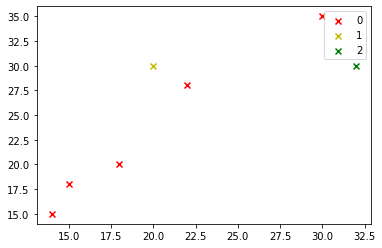

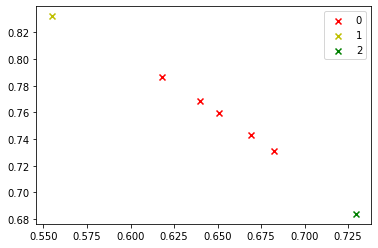

In [7]:

som.train()
res = som.train_result()
classify = {}
for i, win in enumerate(res):
    if not classify.get(win[0]):
        classify.setdefault(win[0], [i])
    else:
        classify[win[0]].append(i)
C = []#未归一化的数据分类结果
D = []#归一化的数据分类结果
for i in classify.values():
    C.append(dataset_old[i].tolist())
    D.append(dataset[i].tolist())
draw(C)
draw(D)